Load the dataset and display the first 10 rows.


In [5]:
import pandas as pd

path="/content/drive/MyDrive/CourseWork1/WHR-2024-5CS037.csv"
df = pd.read_csv(path)
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


Identify the number of rows and columns in the dataset

In [6]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 143
Number of columns: 9


List all the columns and their data types.


In [7]:
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Calculate the mean, median, and standard deviation for the Score column

In [8]:
if 'score' in df.columns:
  mean = df['score'].mean()
  median = df['score'].median()
  std_dev = df['score'].std()

  print(f"Mean of Score: {mean}")
  print(f"Median of Score: {median}")
  print(f"Standard Deviation of Score: {std_dev}")

else:
  print("The column 'Score' doesn't exist in the dataset")

Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


Identify the country with the highest and lowest happiness scores

In [9]:
if 'Country name' in df.columns and 'score' in df.columns:
    highest = df['score'].idxmax()
    lowest = df['score'].idxmin()

    highest_happiness_country = df.loc[highest, 'Country name']
    lowest_happiness_country = df.loc[lowest, 'Country name']

    print(f"Country with the highest happiness score: {highest_happiness_country}")
    print(f"Country with the lowest happiness score: {lowest_happiness_country}")
else:
    print("The necessary columns ('Country name' or 'Score') are missing.")


Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


Check if there are any missing values in the dataset. If so, display the total count for each column

In [10]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filter the dataset to show only the countries with a Score greater than 7.5

In [12]:
if 'score' in df.columns and 'Country name' in df.columns:
  countries = df[df['score']>7.5]

  print("Countries with greater score than 7.5:")
  print(countries[['Country name', 'score']])

else:
  print("There are no countries with score greater than 7.5")

Countries with greater score than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows

In [72]:
if 'score' in df.columns and 'Country name' in df.columns:
  sort = countries.sort_values(by='Log GDP per capita', ascending = False)

  print("Top 10 countries by GDP per Capita (among those with Score > 7.5):")
  print(sort[['Country name', 'score', 'Log GDP per capita']].head(10))

else:
  print("The required columns ('Score', 'Log GDP per capita', or 'Country name') are missing in the dataset.")

Top 10 countries by GDP per Capita (among those with Score > 7.5):
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:
Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [14]:
if 'score' in df.columns:
  df['Happiness_Category'] = pd.cut(df['score'],
                                  bins=[-float('inf'), 4, 6, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

  print(df[['Country name', 'score', 'Happiness_Category']])

else:
  print("The 'score' column is missing in the dataset.")

         Country name  score Happiness_Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


 Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

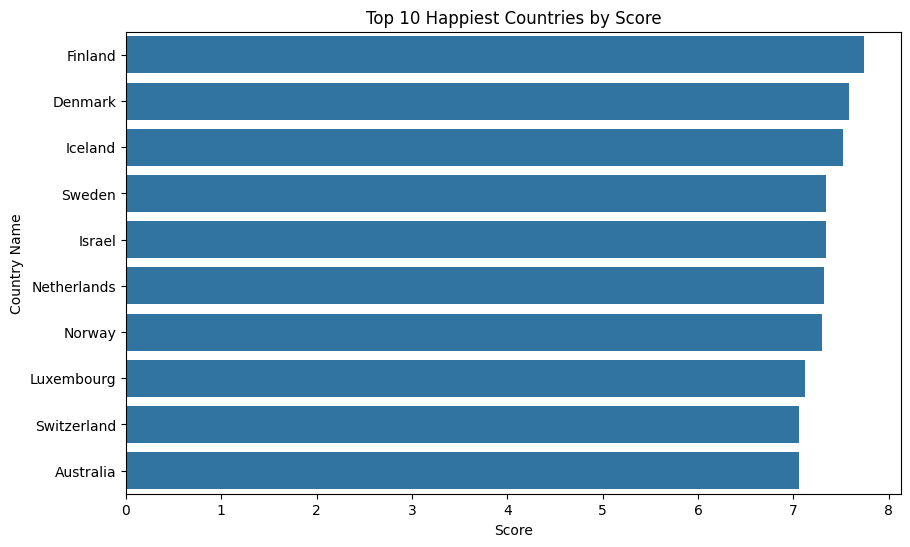

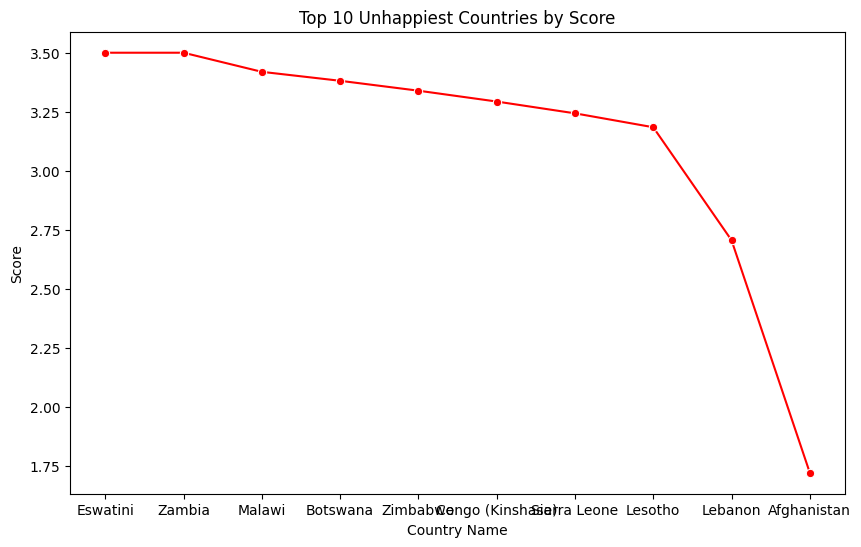

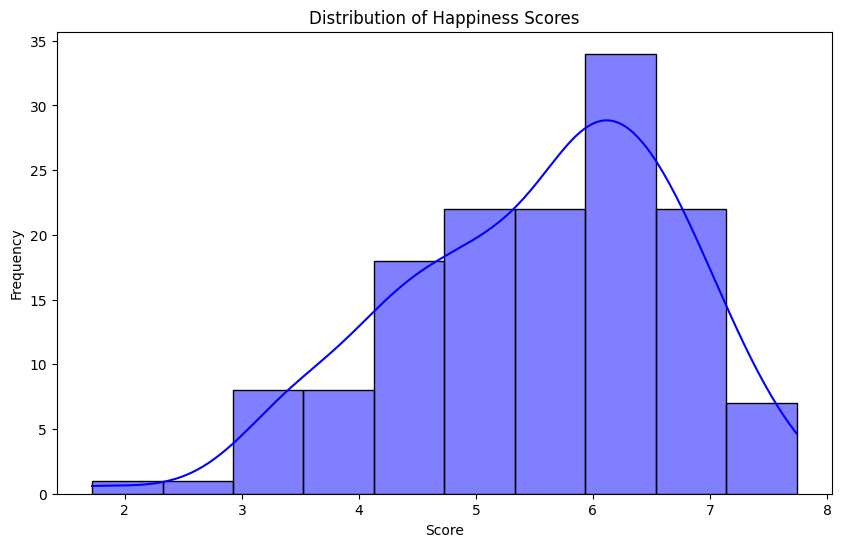

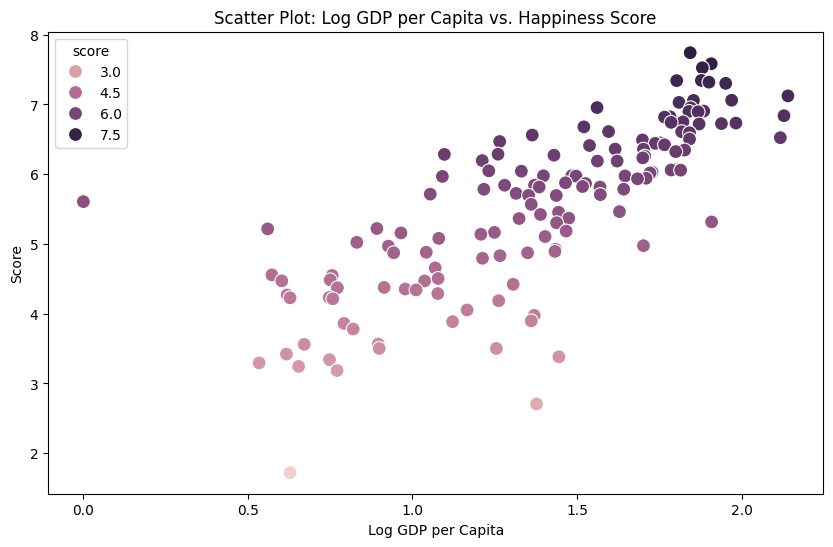

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sort by 'score' for happiness and unhappiness
df_sorted = df.sort_values('score', ascending=False)

# Top 10 happiest countries (Bar Plot)
top_10_happy = df_sorted.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happy, )
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country Name')
plt.show()

# Top 10 unhappiest countries (Line Plot)
top_10_unhappy = df_sorted.tail(10)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappy, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.show()

# Histogram for the Score column
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs. Happiness Score
if 'Log GDP per capita' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='score', s=100)
    plt.title('Scatter Plot: Log GDP per Capita vs. Happiness Score')
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Score')
    plt.show()
else:
    print("Column 'Log GDP per capita' not found in the dataset.")


1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use

In [74]:
SA_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the dataset to only include South Asian countries
SA_countries_df = df[df['Country name'].isin(SA_countries)]

# Save the filtered dataset to a new CSV file for future use
SA_path = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"
SA_countries_df.to_csv(SA_path, index=False)

print(SA_countries_df[['Country name', 'score', 'Log GDP per capita', 'Social support',
                      'Healthy life expectancy', 'Freedom to make life choices',
                      'Generosity', 'Perceptions of corruption']])

# Confirm the file has been saved
print("Filtered dataset has been saved as 'SA_Countries.csv'")


  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3    Sri Lanka  3.898               1.361           1.179   
4   Bangladesh  3.886               1.122           0.249   
5  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.586                         0.583       0.144   
4                    0.513                         0.775       0.140   
5                    0.242                         0.000       0.091   

   Perceptions of corruption  
0                      0.115  
1    

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot

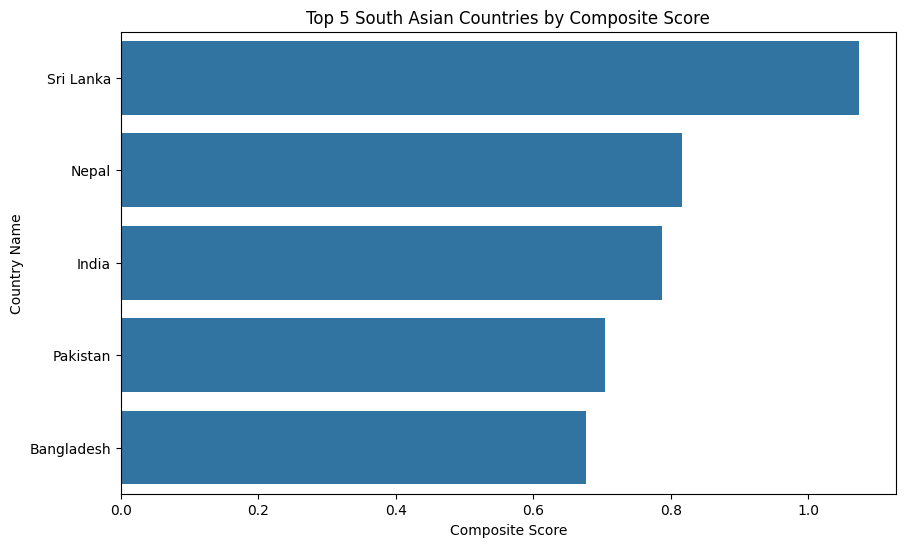

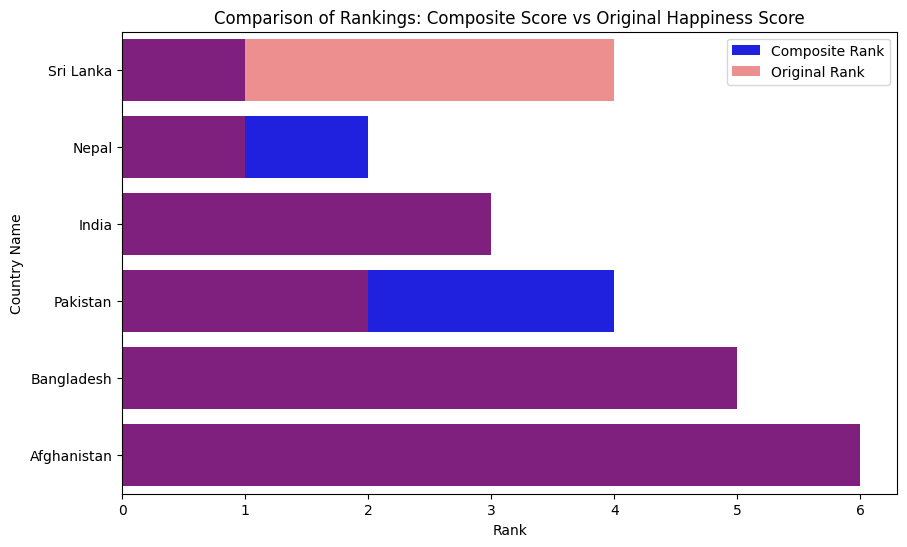

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/CourseWork1/SA_Countries.csv")
df.head(10)
# Create the Composite Score
df['Composite Score'] = 0.40 * df['Log GDP per capita'] + 0.30 * df['Social support'] + 0.30 * df['Healthy life expectancy']

# Rank the countries based on Composite Score in descending order
df_sorted_composite = df.sort_values('Composite Score', ascending=False)

# Visualize the top 5 countries based on Composite Score using a horizontal bar chart
top_5_composite = df_sorted_composite.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.show()

# Compare rankings based on Composite Score vs Original Score
df_sorted_composite['Rank (Composite)'] = df_sorted_composite['Composite Score'].rank(ascending=False)
df_sorted_composite['Rank (Original Score)'] = df_sorted_composite['score'].rank(ascending=False)

# Visualize the comparison between the ranks using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank (Composite)', y='Country name', data=df_sorted_composite.head(10), color='blue', label='Composite Rank')
sns.barplot(x='Rank (Original Score)', y='Country name', data=df_sorted_composite.head(10), color='red', label='Original Rank', alpha=0.5)
plt.title('Comparison of Rankings: Composite Score vs Original Happiness Score')
plt.xlabel('Rank')
plt.ylabel('Country Name')
plt.legend()
plt.show()


1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.


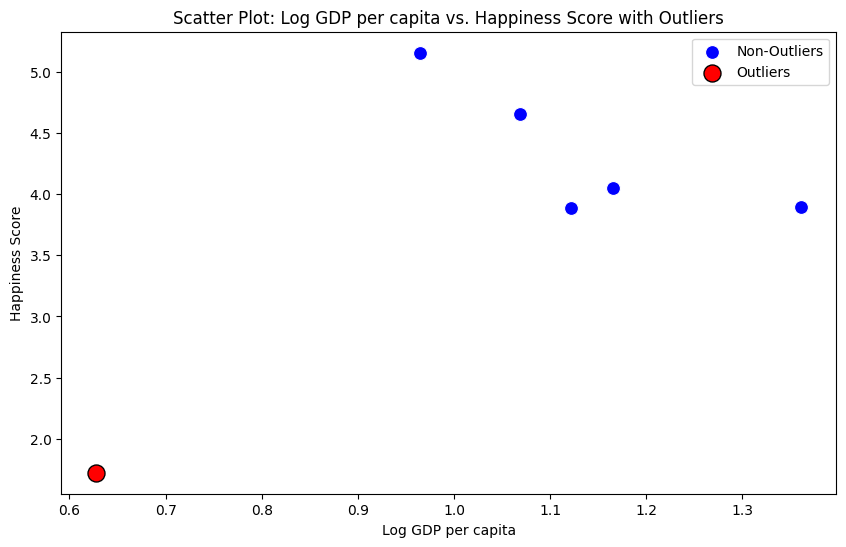

Outliers based on Score and Log GDP per capita:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (filtered South Asian data)
df = pd.read_csv("/content/drive/MyDrive/CourseWork1/SA_Countries.csv")

# Clean up column names by stripping any extra spaces
df.columns = df.columns.str.strip()

# Calculate IQR for 'score' and 'GDP per Capita'
Q1_score = df['score'].quantile(0.25)
Q3_score = df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = df['Log GDP per capita'].quantile(0.25)
Q3_gdp = df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define outlier bounds for 'score' and 'GDP per Capita'
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers based on the bounds
outliers_score = df[(df['score'] < lower_bound_score) | (df['score'] > upper_bound_score)]
outliers_gdp = df[(df['Log GDP per capita'] < lower_bound_gdp) | (df['Log GDP per capita'] > upper_bound_gdp)]

# Combine outliers from both columns (score or GDP per Capita)
outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

# Scatter plot with GDP per Capita vs. Score, highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='blue', label='Non-Outliers', s=100)

# Highlight outliers in a different color (e.g., red)
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers', s=150, edgecolor='black')

plt.title('Scatter Plot: Log GDP per capita vs. Happiness Score with Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Display outliers for inspection
print("Outliers based on Score and Log GDP per capita:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])


1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.


Pearson correlation between Freedom to make life choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


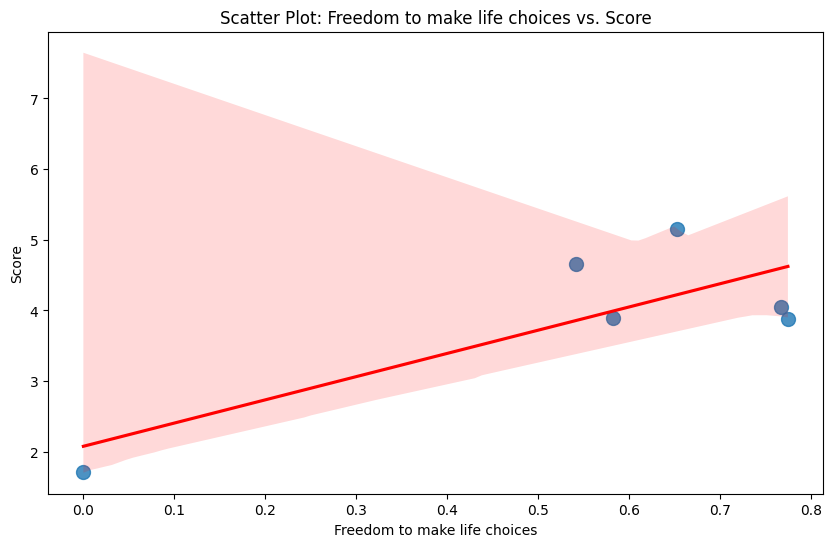

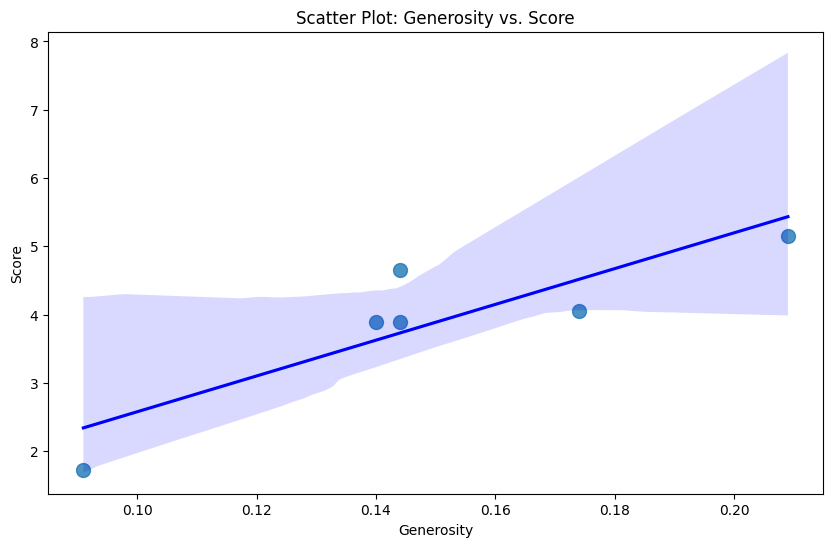

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (filtered South Asian data)
df = pd.read_csv("/content/drive/MyDrive/CourseWork1/SA_Countries.csv")

# Clean up column names by stripping any extra spaces
df.columns = df.columns.str.strip()

# Choose two metrics: 'Freedom to make life choices' and 'Generosity'
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'
target = 'score'

# Calculate Pearson correlation using numpy for both metrics
correlation_1 = np.corrcoef(df[metric_1], df[target])[0, 1]
correlation_2 = np.corrcoef(df[metric_2], df[target])[0, 1]

# Print the correlation values
print(f"Pearson correlation between {metric_1} and Score: {correlation_1}")
print(f"Pearson correlation between {metric_2} and Score: {correlation_2}")

# Scatter plot for Freedom to Make Life Choices vs. Score with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x=metric_1, y=target, data=df, scatter_kws={'s':100}, line_kws={"color": "red"})
plt.title(f"Scatter Plot: {metric_1} vs. Score")
plt.xlabel(f"{metric_1}")
plt.ylabel("Score")
plt.show()

# Scatter plot for Generosity vs. Score with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x=metric_2, y=target, data=df, scatter_kws={'s':100}, line_kws={"color": "blue"})
plt.title(f"Scatter Plot: {metric_2} vs. Score")
plt.xlabel(f"{metric_2}")
plt.ylabel("Score")
plt.show()

# Discussion: Identify and discuss the strongest and weakest relationships


1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries

Top 3 countries with the largest positive GDP-Score gaps:
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764

Top 3 countries with the largest negative GDP-Score gaps:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888


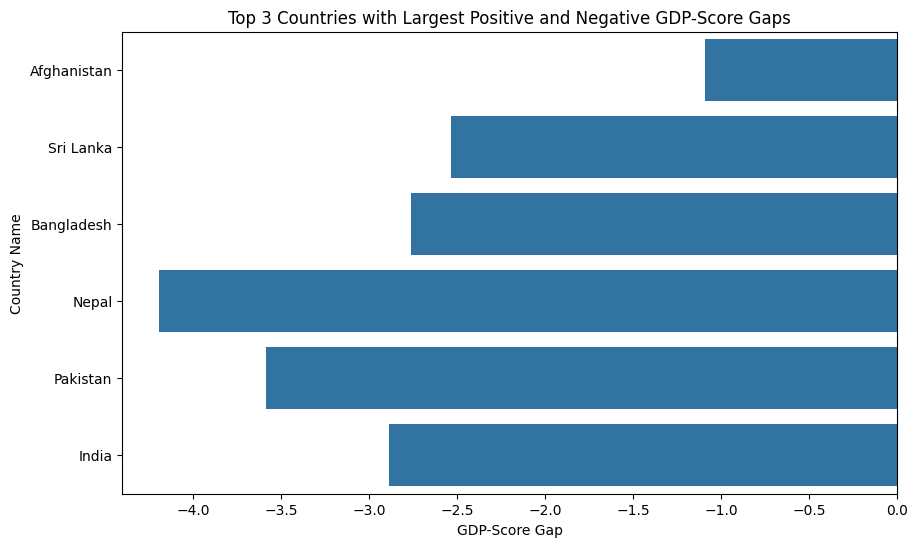

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (filtered South Asian data)
df = pd.read_csv("/content/drive/MyDrive/CourseWork1/SA_Countries.csv")

# Clean up column names by stripping any extra spaces
df.columns = df.columns.str.strip()

# Add a new column 'GDP-Score Gap' (Difference between Log GDP per capita and Score)
df['GDP-Score Gap'] = df['Log GDP per capita'] - df['score']

# Rank countries by the 'GDP-Score Gap' in both ascending and descending order
df_sorted_ascending = df.sort_values(by='GDP-Score Gap', ascending=True)
df_sorted_descending = df.sort_values(by='GDP-Score Gap', ascending=False)

# Display the top 3 countries with the largest positive and negative GDP-Score gaps
top_3_positive_gap = df_sorted_descending.head(3)
top_3_negative_gap = df_sorted_ascending.head(3)

print("Top 3 countries with the largest positive GDP-Score gaps:")
print(top_3_positive_gap[['Country name', 'GDP-Score Gap']])

print("\nTop 3 countries with the largest negative GDP-Score gaps:")
print(top_3_negative_gap[['Country name', 'GDP-Score Gap']])

# Bar plot for the top 3 countries with the largest positive and negative GDP-Score gaps
plt.figure(figsize=(10, 6))

# Combine top positive and negative gap countries for plotting
gap_data = pd.concat([top_3_positive_gap, top_3_negative_gap])
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_data)

# Set title and labels
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')

# Display the plot
plt.show()

# Analyze the reasons behind these gaps:
# - Top 3 countries with large positive gaps typically have a high GDP per Capita but lower happiness scores.
# - Top 3 countries with large negative gaps have high happiness scores but relatively lower GDP per Capita.
# - Possible reasons: social factors, political stability, environmental conditions, inequality, etc.


1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]


In [ ]:
import pandas as pd

path="/content/drive/MyDrive/CourseWork1/WHR-2024-5CS037.csv"
df = pd.read_csv(path)


# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

# Filter the dataset to include only the Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Save the filtered dataframe to a new CSV file for future use
middle_east_path = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
middle_east_df.to_csv(middle_east_path, index=False)
#middle_east_df.to_csv("Middle_East.csv", index=False)

# Display the filtered dataframe
print(middle_east_df[['Country name', 'score', 'Log GDP per capita', 'Social support',
                      'Healthy life expectancy', 'Freedom to make life choices',
                      'Generosity', 'Perceptions of corruption']])


             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?


In [64]:
import pandas as pd

# Define file paths
path_ME = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
path_SA = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"

# Load datasets
sa_df = pd.read_csv(path_SA)
me_df = pd.read_csv(path_ME)

# Ensure the 'Country name' and 'score' columns exist
if 'Country name' in sa_df.columns and 'score' in sa_df.columns and 'Country name' in me_df.columns and 'score' in me_df.columns:

    # Calculate mean and standard deviation for South Asia
    sa_mean = sa_df['score'].mean()
    sa_std = sa_df['score'].std()

    # Calculate mean and standard deviation for Middle East
    me_mean = me_df['score'].mean()
    me_std = me_df['score'].std()

    # Print results
    print(f"South Asia - Mean: {sa_mean:.2f}, Std: {sa_std:.2f}")
    print(f"Middle East - Mean: {me_mean:.2f}, Std: {me_std:.2f}")

    # Determine which region has higher average happiness scores
    if sa_mean > me_mean:
        print("South Asia has a higher average happiness score.")
    else:
        print("Middle East has a higher average happiness score.")
else:
    print("Ensure both datasets have 'Country name' and 'score' columns.")


South Asia - Mean: 3.90, Std: 1.18
Middle East - Mean: 5.41, Std: 1.57
Middle East has a higher average happiness score.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.


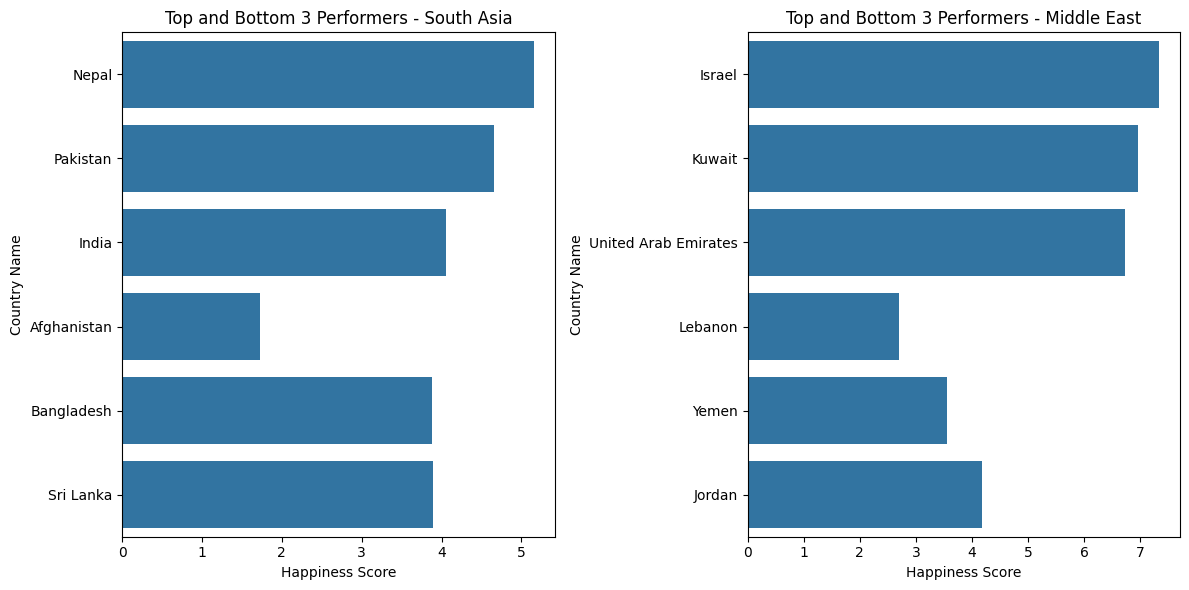

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
path_ME = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
path_SA = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"

# Load datasets
sa_df = pd.read_csv(path_SA)
me_df = pd.read_csv(path_ME)

# Get top and bottom 3 performers based on 'score' for both regions
top_3_south_asia = sa_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_south_asia = sa_df.nsmallest(3, 'score')[['Country name', 'score']]

top_3_middle_east = me_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_middle_east = me_df.nsmallest(3, 'score')[['Country name', 'score']]

# Plot Top and Bottom 3 Performers in South Asia
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_south_asia, bottom_3_south_asia]))
plt.title("Top and Bottom 3 Performers - South Asia")
plt.xlabel("Happiness Score")
plt.ylabel("Country Name")

# Middle East
plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name',data=pd.concat([top_3_middle_east, bottom_3_middle_east]))
plt.title("Top and Bottom 3 Performers - Middle East")
plt.xlabel("Happiness Score")
plt.ylabel("Country Name")

# Display the plots
plt.tight_layout()
plt.show()


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?


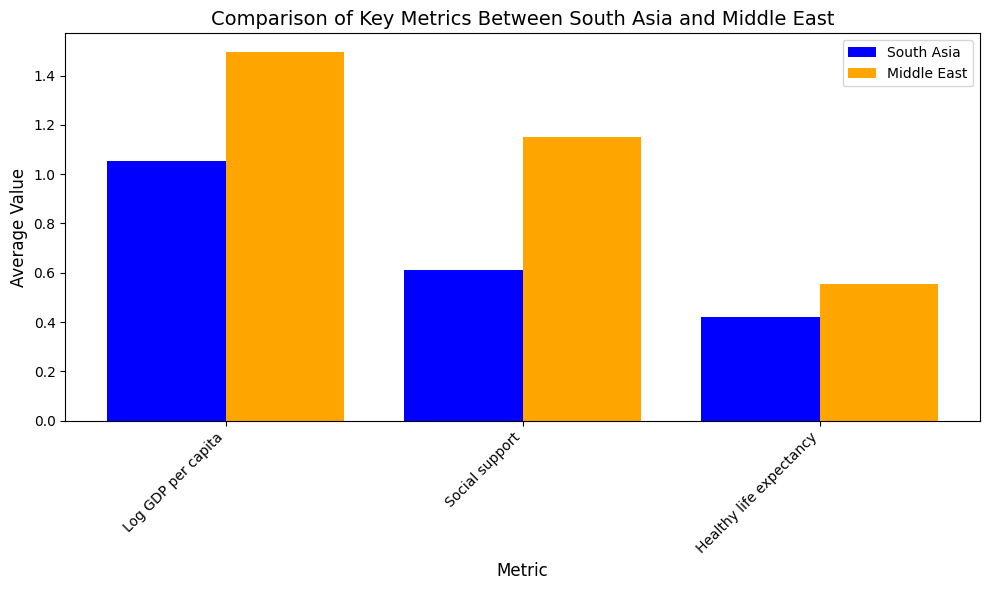

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
path_ME = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
path_SA = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"

# Load datasets
sa_df = pd.read_csv(path_SA)
me_df = pd.read_csv(path_ME)
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Compute mean values for each metric
south_asia_metrics = pd.DataFrame(sa_df[metrics].mean()).reset_index()
south_asia_metrics.columns = ['Metric', 'South Asia']

middle_east_metrics = pd.DataFrame(me_df[metrics].mean()).reset_index()
middle_east_metrics.columns = ['Metric', 'Middle East']
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculate the mean for each metric in both regions
south_asia_means = sa_df[metrics].mean()
middle_east_means = me_df[metrics].mean()

# Combine the results into a single DataFrame
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_means.values,
    'Middle East': middle_east_means.values
})

# Plot the data as a grouped bar chart
plt.figure(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.4
x = range(len(metrics))

# Create bars for South Asia
plt.bar(x, comparison_df['South Asia'], width=bar_width, label='South Asia', color='blue')

# Create bars for Middle East
plt.bar([pos + bar_width for pos in x], comparison_df['Middle East'], width=bar_width, label='Middle East', color='orange')

# Add labels, title, and legend
plt.xticks([pos + bar_width / 2 for pos in x], comparison_df['Metric'], rotation=45, ha='right')
plt.title('Comparison of Key Metrics Between South Asia and Middle East', fontsize=14)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [50]:
import pandas as pd

# Define file paths
path_ME = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
path_SA = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"

# Load datasets
sa_df = pd.read_csv(path_SA)
me_df = pd.read_csv(path_ME)

# Calculate range (max - min) for Score in both regions
south_asia_range = sa_df['score'].max() - sa_df['score'].min()
middle_east_range = me_df['score'].max() - me_df['score'].min()

# Calculate coefficient of variation (CV) for Score in both regions
south_asia_mean = sa_df['score'].mean()
south_asia_std = sa_df['score'].std()
south_asia_cv = (south_asia_std / south_asia_mean) * 100

middle_east_mean = me_df['score'].mean()
middle_east_std = me_df['score'].std()
middle_east_cv = (middle_east_std / middle_east_mean) * 100

# Display results
print(f"South Asia - Range of Score: {south_asia_range:.2f}")
print(f"Middle East - Range of Score: {middle_east_range:.2f}")

print(f"South Asia - Coefficient of Variation (CV) for Score: {south_asia_cv:.2f}%")
print(f"Middle East - Coefficient of Variation (CV) for Score: {middle_east_cv:.2f}%")

# Compare variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")


South Asia - Range of Score: 3.44
Middle East - Range of Score: 4.63
South Asia - Coefficient of Variation (CV) for Score: 30.21%
Middle East - Coefficient of Variation (CV) for Score: 28.94%
South Asia has greater variability in happiness scores.


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

South Asia Correlations:
Score vs Freedom to Make Life Choices: 0.80
Score vs Generosity: 0.87

Middle East Correlations:
Score vs Freedom to Make Life Choices: 0.86
Score vs Generosity: 0.63


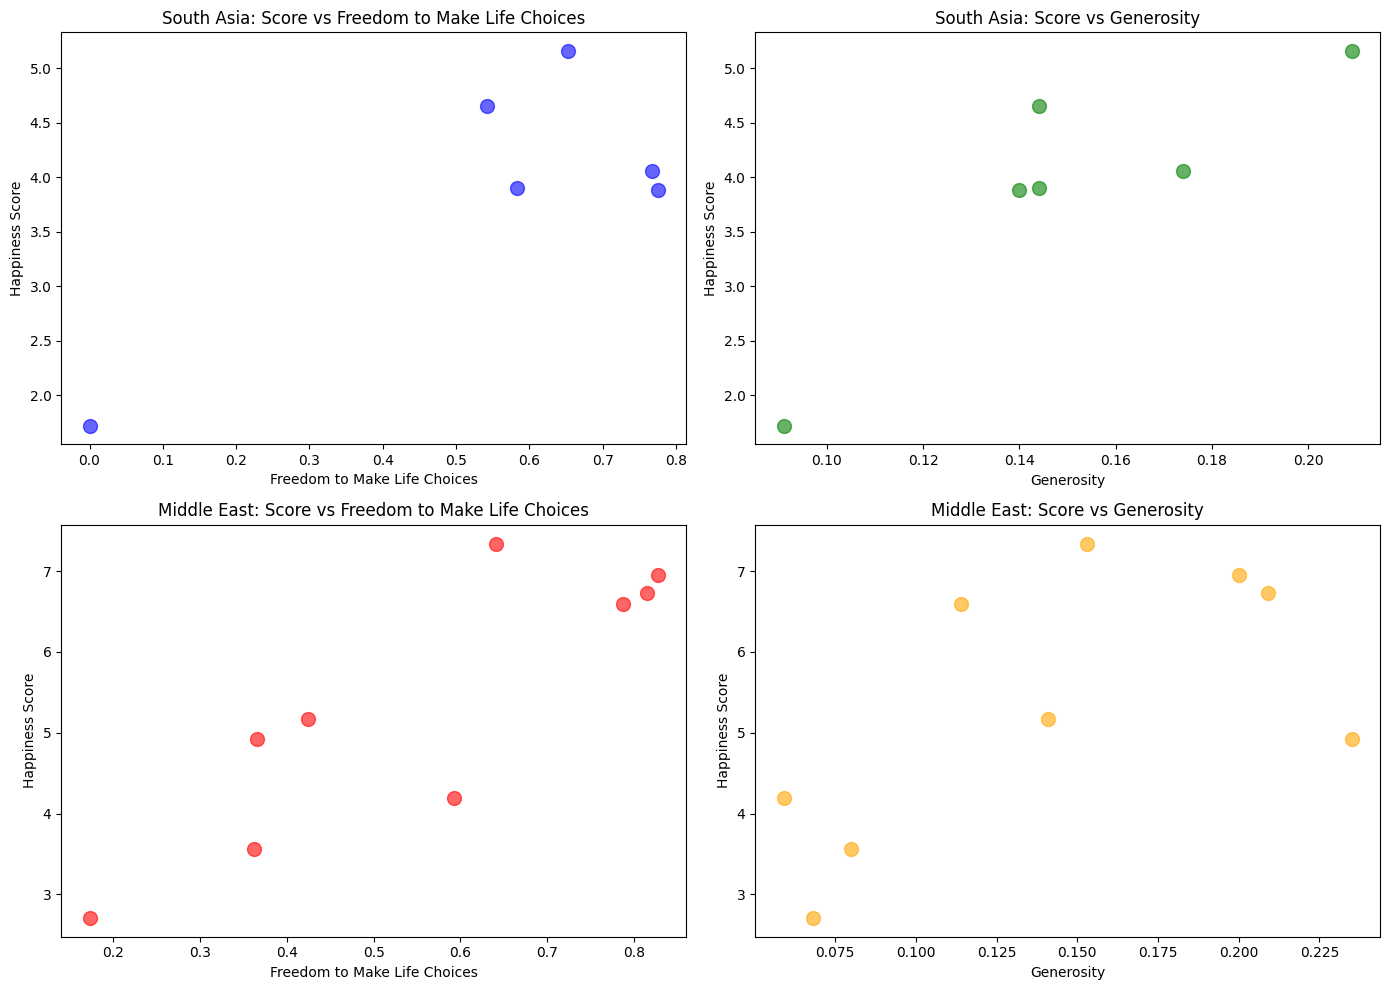

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
path_ME = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
path_SA = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"

# Load datasets
sa_df = pd.read_csv(path_SA)
me_df = pd.read_csv(path_ME)

# Step 1: Calculate Pearson correlation for Score with other metrics
# For South Asia
south_asia_corr_freedom = sa_df['score'].corr(sa_df['Freedom to make life choices'])
south_asia_corr_generosity = sa_df['score'].corr(sa_df['Generosity'])

# For Middle East
middle_east_corr_freedom = me_df['score'].corr(me_df['Freedom to make life choices'])
middle_east_corr_generosity = me_df['score'].corr(me_df['Generosity'])

# Display the correlation values
print("South Asia Correlations:")
print(f"Score vs Freedom to Make Life Choices: {south_asia_corr_freedom:.2f}")
print(f"Score vs Generosity: {south_asia_corr_generosity:.2f}")

print("\nMiddle East Correlations:")
print(f"Score vs Freedom to Make Life Choices: {middle_east_corr_freedom:.2f}")
print(f"Score vs Generosity: {middle_east_corr_generosity:.2f}")

# Step 2: Create simple scatter plots (no regression lines)
# Set up the plot size
plt.figure(figsize=(14, 10))

# Scatter plot for South Asia - Score vs Freedom to Make Life Choices
plt.subplot(2, 2, 1)
plt.scatter(sa_df['Freedom to make life choices'], sa_df['score'], color='blue', alpha=0.6, s=100)
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# Scatter plot for South Asia - Score vs Generosity
plt.subplot(2, 2, 2)
plt.scatter(sa_df['Generosity'], sa_df['score'], color='green', alpha=0.6, s=100)
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

# Scatter plot for Middle East - Score vs Freedom to Make Life Choices
plt.subplot(2, 2, 3)
plt.scatter(me_df['Freedom to make life choices'], me_df['score'], color='red', alpha=0.6, s=100)
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# Scatter plot for Middle East - Score vs Generosity
plt.subplot(2, 2, 4)
plt.scatter(me_df['Generosity'], me_df['score'], color='orange', alpha=0.6, s=100)
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

# Display the plots
plt.tight_layout()
plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.


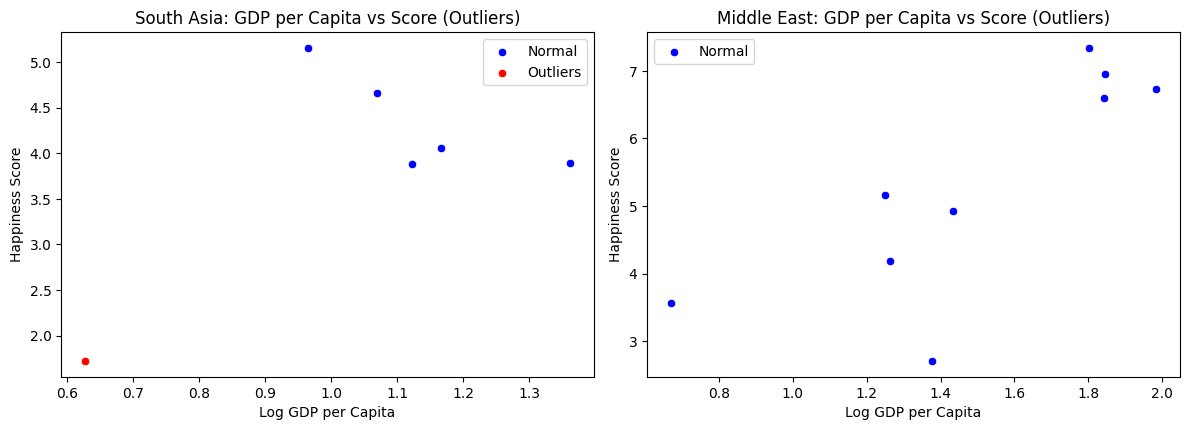

South Asia Outliers (Score or GDP per Capita):
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628
5  Afghanistan  1.721               0.628

Middle East Outliers (Score or GDP per Capita):
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
path_ME = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
path_SA = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"

# Load datasets
sa_df = pd.read_csv(path_SA)
me_df = pd.read_csv(path_ME)

# Function to detect outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Step 1: Detect outliers for Score and GDP per Capita for both regions
south_asia_outliers_score = detect_outliers(sa_df, 'score')
south_asia_outliers_gdp = detect_outliers(sa_df, 'Log GDP per capita')

middle_east_outliers_score = detect_outliers(me_df, 'score')
middle_east_outliers_gdp = detect_outliers(me_df, 'Log GDP per capita')

# Combine outliers for plotting
south_asia_outliers = pd.concat([south_asia_outliers_score, south_asia_outliers_gdp])
middle_east_outliers = pd.concat([middle_east_outliers_score, middle_east_outliers_gdp])

# Step 2: Plot the outliers
plt.figure(figsize=(12, 8))

# South Asia - Scatter Plot for GDP per Capita vs Score
plt.subplot(2, 2, 1)
sns.scatterplot(x='Log GDP per capita', y='score', data=sa_df, color='blue', label='Normal')
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'], color='red', label='Outliers')
plt.title('South Asia: GDP per Capita vs Score (Outliers)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()

# Middle East - Scatter Plot for GDP per Capita vs Score
plt.subplot(2, 2, 2)
sns.scatterplot(x='Log GDP per capita', y='score', data=me_df, color='blue', label='Normal')
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'], color='red', label='Outliers')
plt.title('Middle East: GDP per Capita vs Score (Outliers)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

# Print outlier details
print("South Asia Outliers (Score or GDP per Capita):")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers (Score or GDP per Capita):")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.


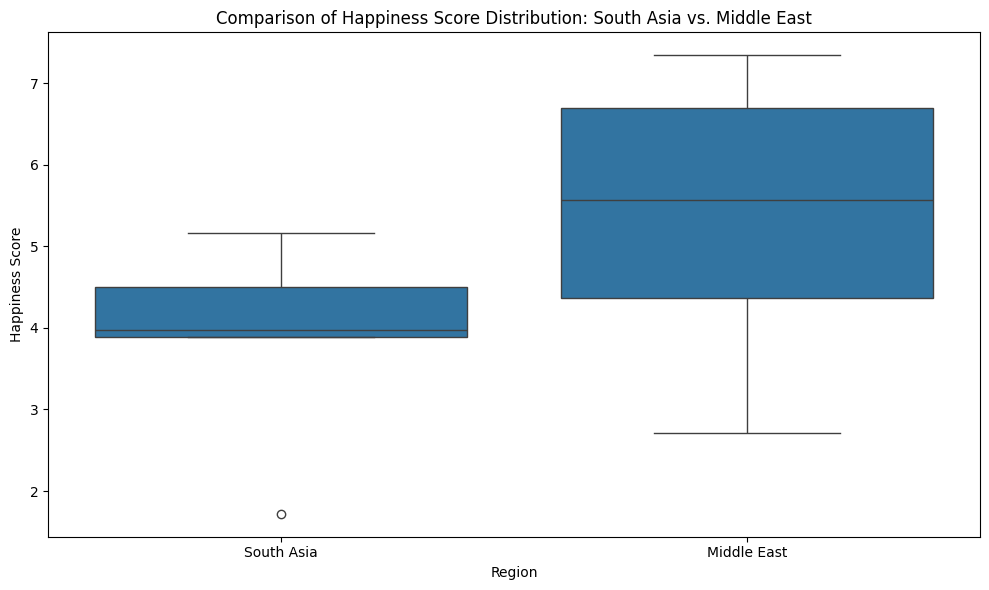

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
path_ME = "/content/drive/MyDrive/CourseWork1/Middle_East.csv"
path_SA = "/content/drive/MyDrive/CourseWork1/SA_Countries.csv"

# Load datasets
sa_df = pd.read_csv(path_SA)
me_df = pd.read_csv(path_ME)

# Add 'Region' column using .loc to avoid SettingWithCopyWarning
sa_df.loc[:, 'Region'] = 'South Asia'
me_df.loc[:, 'Region'] = 'Middle East'

# Concatenate the two DataFrames (South Asia and Middle East)
combined_df = pd.concat([sa_df[['Country name', 'score', 'Region']],
                         me_df[['Country name', 'score', 'Region']]])

# Create a boxplot for Score by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)

# Title and labels
plt.title('Comparison of Happiness Score Distribution: South Asia vs. Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

# Show the plot
plt.tight_layout()
plt.show()
